<a href="https://colab.research.google.com/github/Nghiatrng/Hoc_may1/blob/main/H%E1%BB%8DcM%C3%A1y1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
#tải dữ liệu
df = pd.read_excel('/content/sample_data/Dry_Bean_Dataset.xlsx')

In [ ]:
#xuất 5 dòng đầu của dataset
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
#Hiển thị số cột, dòng của dataset
df.shape

(13611, 17)

In [ ]:
#Hiển thị thông tin tổng quát về DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
#Tóm tắt thống kê của các cột số trong Dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


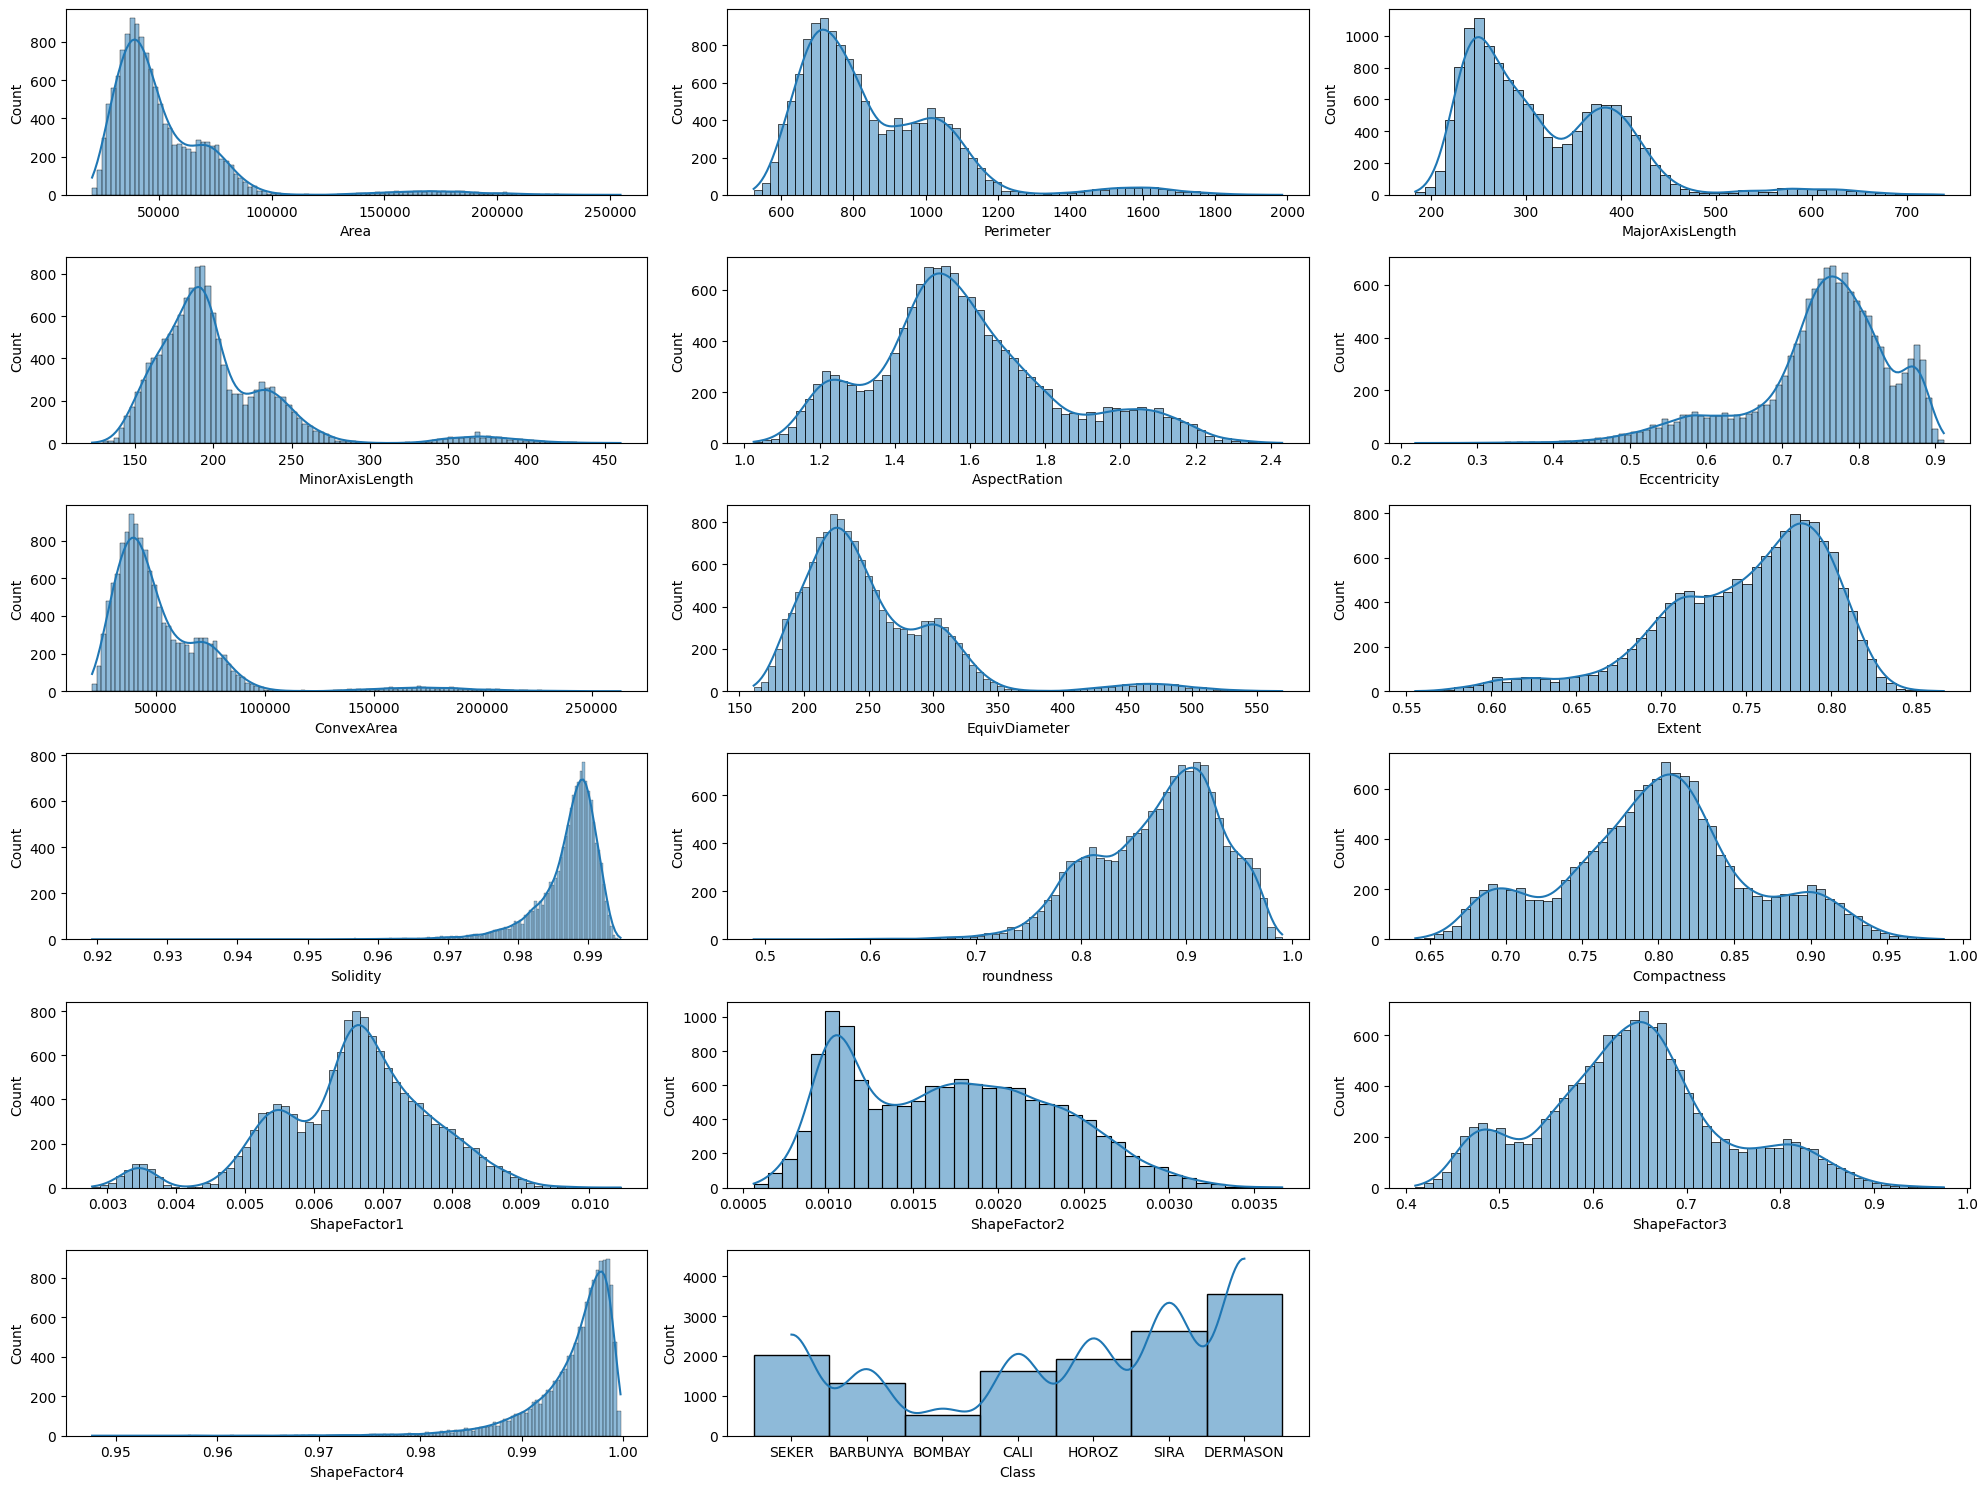

In [ ]:
# Phân tích từng thuộc tính
plt.figure(figsize=(20,15),facecolor='white')
pltnum =1
for column in df:
    if pltnum <= 17:
        ax = plt.subplot(6,3,pltnum)
        sns.histplot(x=column,data=df,kde=True)
    pltnum +=1
plt.tight_layout()
plt.show()

In [ ]:
df.Class.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [ ]:
#Đếm số lượng giá trị thiếu trong từng cột của DataFrame
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [ ]:
mapping_dict = {'DERMASON': 1, 'SIRA': 2, 'SEKER': 3, 'HOROZ': 4, 'CALI': 5, 'BARBUNYA': 6, 'BOMBAY': 7 }
df['Class'] = df['Class'].map(mapping_dict)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


Xử lí dữ liệu

In [ ]:
#sử dụng hàm StandardScaler() từ thư viện sklearn.preprocessing để chuẩn hóa các đặc trưng của tập dữ liệu.
x_to_scale = df.iloc[:,:-1]

In [ ]:
#Tạo một đối tượng MinMaxScaler()
scale = MinMaxScaler()
df_scaled = scale.fit_transform(x_to_scale)

In [ ]:
#Trích xuất và lưu trữ các cột dữ liệu số
df_sc = pd.DataFrame(df_scaled,columns=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'])
df_sc

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.034053,0.058574,0.044262,0.152142,0.122612,0.477797,0.033107,0.070804,0.671024,0.922824,0.934823,0.786733,0.593432,0.833049,0.750996,0.980620
1,0.035500,0.077557,0.030479,0.178337,0.051577,0.278472,0.034991,0.073577,0.735504,0.871514,0.793138,0.903549,0.547447,0.967315,0.884987,0.974979
2,0.038259,0.068035,0.052633,0.158190,0.131521,0.496448,0.037126,0.078816,0.716671,0.932141,0.914511,0.773514,0.582016,0.800942,0.736200,0.987196
3,0.040940,0.082942,0.048548,0.177691,0.091623,0.403864,0.041389,0.083854,0.731365,0.761614,0.826871,0.829912,0.552408,0.854744,0.799846,0.893675
4,0.041504,0.065313,0.032862,0.200679,0.025565,0.165680,0.040123,0.084906,0.700538,0.949832,0.988408,0.951583,0.510741,1.000000,0.941770,0.989116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,0.092559,0.160862,0.189318,0.187843,0.375584,0.788553,0.089967,0.172180,0.512286,0.942381,0.852151,0.465175,0.531785,0.382135,0.412185,0.974113
13607,0.092576,0.159358,0.176450,0.201964,0.321303,0.746241,0.089910,0.172207,0.786890,0.947954,0.862952,0.523974,0.509582,0.426233,0.470848,0.970912
13608,0.092739,0.160605,0.176384,0.203370,0.318558,0.743877,0.090219,0.172463,0.561689,0.936648,0.855785,0.525351,0.508683,0.427019,0.472240,0.943025
13609,0.092773,0.163657,0.179703,0.200669,0.330472,0.753971,0.090623,0.172517,0.482741,0.908991,0.834795,0.510145,0.514216,0.415330,0.456919,0.913342


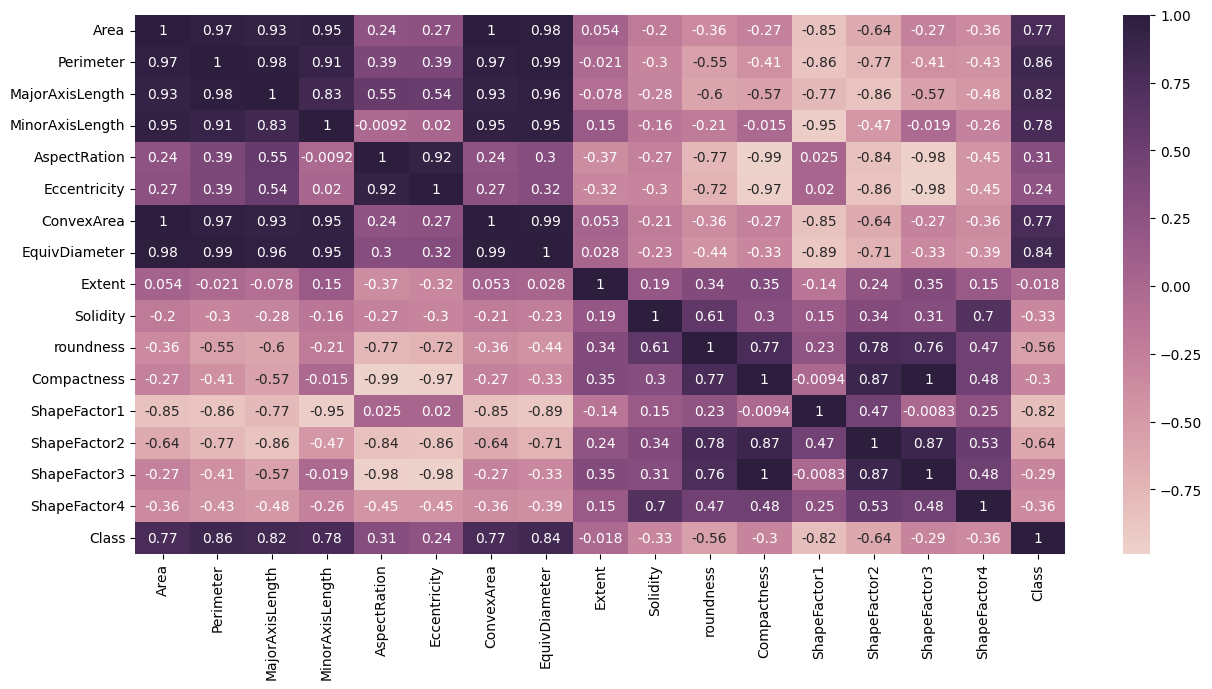

In [ ]:
#Tạo biếu đồ nhiệt với kích thước 15inc chiều rộng và 7inc chiều cao
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

Thuật toán PCA

In [ ]:
from sklearn.decomposition import PCA

Text(0.5, 1.0, 'Explained Variance')

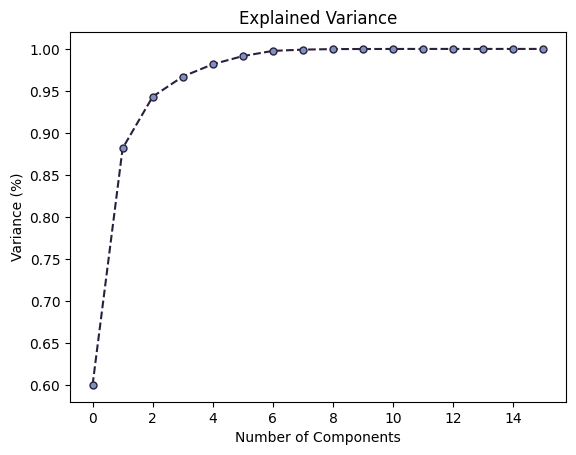

In [ ]:
#Tạo một đối tượng PCA().Kết quả của thuật toán PCA được lưu vào biến principalComponents
pca = PCA()
principalComponents = pca.fit_transform(df_sc)
#vẽ biểu đồ phân tán của hai thành phần chính của dữ liệu
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='#2b1f3e', linestyle='dashed',
marker='o',markerfacecolor='#7d92bf', markersize=5)
plt.xlabel('Number of Components')#Trục x
plt.ylabel('Variance (%)') #Trục y
plt.title('Explained Variance')#Tiêu đề

In [ ]:
#Tạo PCA với thành phần chính là 9
pca = PCA(n_components=9)
new_data = pca.fit_transform(df_sc)
#Tạo ra một đối tượng DataFrame
principal_Df = pd.DataFrame(data = new_data
             , columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9'])

In [ ]:
#Hiển thị 5 dòng đầu tiên của DataFrame mới tạo
principal_Df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-0.840070,0.181365,0.074199,0.021128,0.030045,0.088796,0.080800,-0.014584,-0.037817
1,-1.006579,0.366748,0.098566,0.186345,-0.079589,0.189854,0.184862,0.004574,-0.029621
2,-0.798926,0.185865,0.025051,0.021419,0.007362,0.082673,0.071173,-0.004354,-0.033926
3,-0.845979,0.275725,0.064797,0.243850,0.013191,0.127964,0.098995,-0.059566,-0.021705
4,-1.119803,0.476853,0.146292,0.051970,0.003066,0.110990,0.266353,-0.027102,-0.001404


In [ ]:
#Hiển thị số cột, dòng của dataset mới
principal_Df.shape

(13611, 9)

<Axes: >

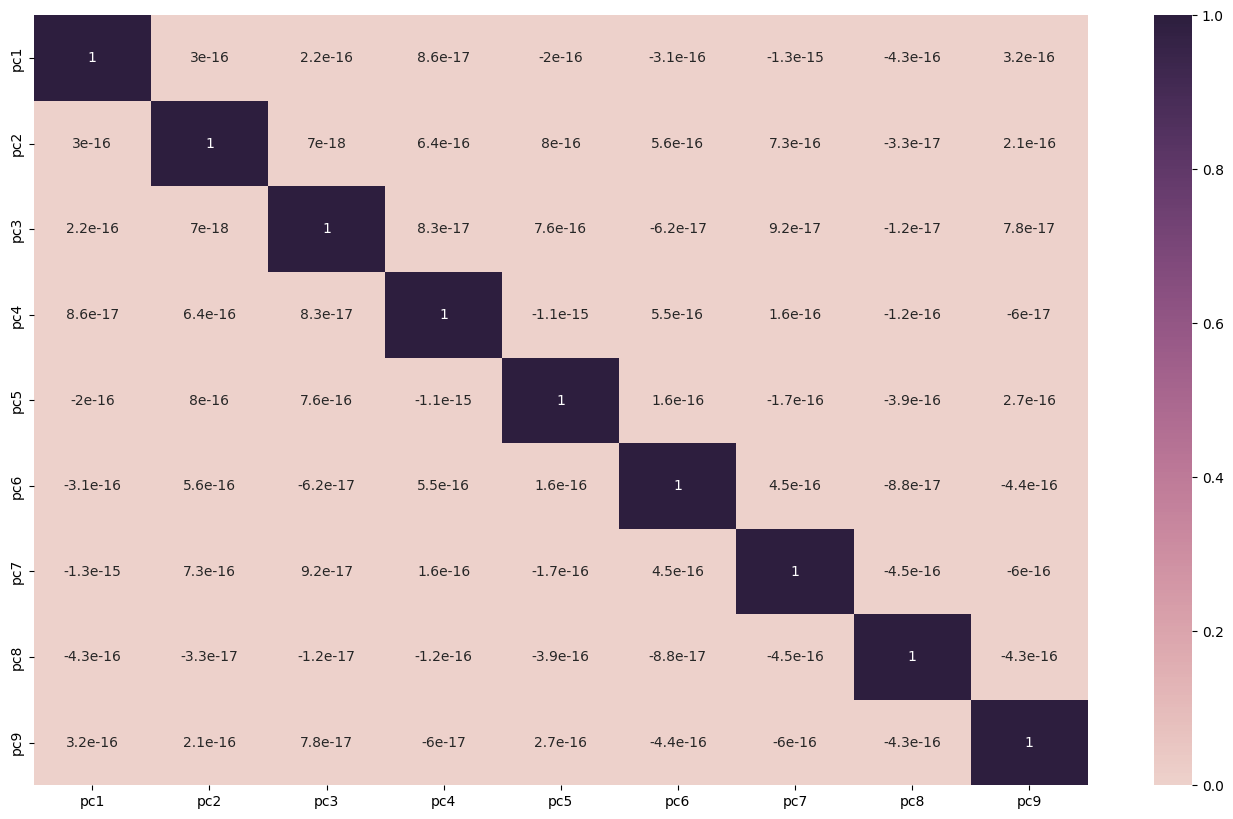

In [ ]:
#Vẽ biểu đồ nhiệt với kích thước 17inc chiều rộng và 10inc chiều cao
plt.figure(figsize=(17,10))
sns.heatmap(principal_Df.corr(),annot=True,cmap=sns.cubehelix_palette(as_cmap=True))

Xây dựng mô hình


In [ ]:
mapping_dict = { 1:'DERMASON',  2:'SIRA',  3:'SEKER',  4:'HOROZ',  5:'CALI',  6:'BARBUNYA',  7:'BOMBAY' }
df['Class'] = df['Class'].map(mapping_dict)

In [ ]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
#x lấy tất cả giá trị của cột để tạo DataFrame chứa các đặc trưng
x = principal_Df
#Lấy cột 'Class' để tạo Series chứa biến mục tiêu
y = df['Class']

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.2,random_state=42)

In [ ]:
#Đếm số lần xuất hiện của mỗi giá trị trong cột Class
df.Class.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

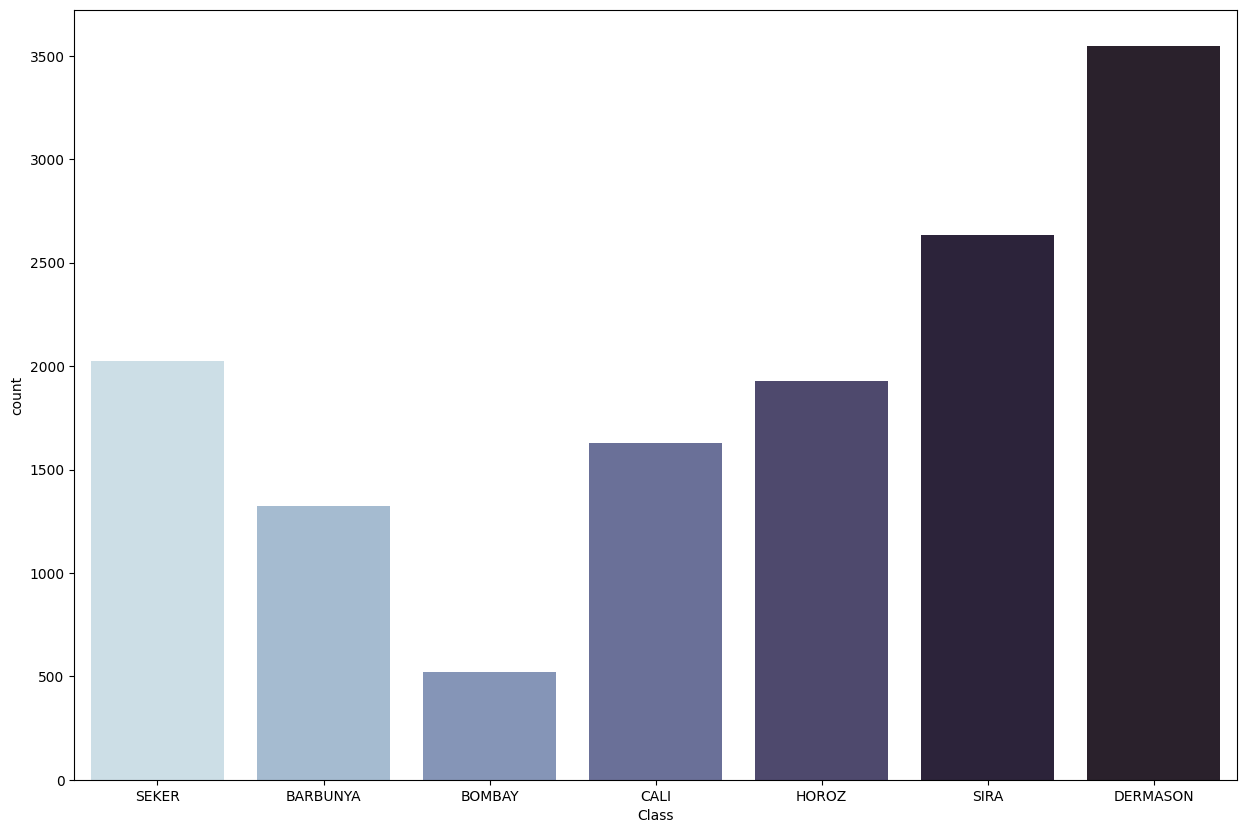

In [ ]:
#Vẽ đồ thị cột về mức độ quan trọng của các đặc trưng
plt.figure(figsize=(15,10))
sns.countplot(x='Class',data=df,palette=['#c7dfeb', '#9ebbd7', '#7d92bf', '#636a9f', '#494373', '#2b1f3e','#2b1f2e'])
plt.show()

In [ ]:
#Sử dụng SMOTE để tăng cường dữ liệu huấn luyện.
oversample = SMOTE(random_state=42)
#Lưu trữ dữ liệu đào tạo
x_sampled,y_sampled = oversample.fit_resample(x_train,y_train)

In [ ]:
#Hiển thị số cột, dòng
x_sampled.shape

(5117, 9)

In [ ]:
#Trả về một Series chứa số lần xuất hiện của mỗi giá trị trong cột Class của đối tượng y_sampled.
y_sampled.value_counts()

HOROZ       731
CALI        731
SIRA        731
SEKER       731
DERMASON    731
BOMBAY      731
BARBUNYA    731
Name: Class, dtype: int64

In [ ]:
#Tạo ra một đối tượng f1_scorer để đánh giá mô hình
f1_scorer = make_scorer(f1_score, average='weighted', pos_label=1)#lớp dương
cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=3)

Độ chính xác của thuật toán

In [ ]:
def run_multiple_algorithms(x_train,y_train, x_test, y_test, models):
    results = {}
    for model_name, model in models.items():
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        y_pre_train = model.predict(x_train)
        accuracy = accuracy_score(y_test,y_pred)
        f1_test = f1_score(y_test,y_pred,average='weighted')
        f1_train = f1_score(y_train,y_pre_train,average='weighted')
        recall = recall_score(y_test,y_pred,average='weighted')
        cv_scores = cross_val_score(model, x, y, cv=cv, scoring=f1_scorer).mean()
        cv_score_mean = cross_val_score(model, x, y, cv=cv, scoring=f1_scorer).std()

        results[model_name] = {
            'accuracy' : accuracy,
            'accuracy_score':accuracy*100,
            'f1 train score' : f1_train,
            'f1 test score' : f1_test,
            'recall score': recall,
            'cross_val_scores' : cv_scores,
            'cross_val_std' : cv_score_mean

        }


    return results

In [ ]:
models_to_run = {
    'Logistic Regression': LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'SVM': SVC(),
}

results = run_multiple_algorithms(x_train,y_train,x_test,y_test, models_to_run)

for model, scores in results.items():
    print(f'Model : {model}')
    print(f"Accuracy : {scores['accuracy']}")
    print(f"F1_score for training dataset: {scores['f1 train score']}")
    print(f"F1_score for testing dataset: {scores['f1 test score']}")
    print(f"Recall score : {scores['recall score']}")
    print(f"Cross-validation scores : {scores['cross_val_scores']}")
    print(f"Cross-validation std : {scores['cross_val_std']}")
    print(f"Accuracy_score is : {scores['accuracy_score']}")
    print('='*50)


Model : Logistic Regression
Accuracy : 0.9093580677748186
F1_score for training dataset: 0.9119036591765445
F1_score for testing dataset: 0.909457494279205
Recall score : 0.9093580677748186
Cross-validation scores : 0.9181370832974309
Cross-validation std : 0.005882496057091332
Accuracy_score is : 90.93580677748186
Model : KNN
Accuracy : 0.9139498576545138
F1_score for training dataset: 0.9326854344644148
F1_score for testing dataset: 0.9139063973931214
Recall score : 0.9139498576545138
Cross-validation scores : 0.919802857101522
Cross-validation std : 0.003402632238259673
Accuracy_score is : 91.39498576545138
Model : SVM
Accuracy : 0.922123243640371
F1_score for training dataset: 0.9282419717887318
F1_score for testing dataset: 0.9221717884620588
Recall score : 0.922123243640371
Cross-validation scores : 0.9281974610810996
Cross-validation std : 0.007277404509365374
Accuracy_score is : 92.2123243640371


Thuật toán Decision Tree


In [ ]:
#Xây dựng cây Decision Tree
# Xây dựng và huấn luyện mô hình Decision Tree với max_depth=3
dt_classifier = DecisionTreeClassifier(random_state=42,max_depth=3)
dt_classifier.fit(x_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
y_pred = dt_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
# In kết quả
print(f'Decision Tree Accuracy: {accuracy}')
print(f'Accuracy_score is {accuracy*100}')

Decision Tree Accuracy: 0.817981449168886
Accuracy_score is 81.7981449168886


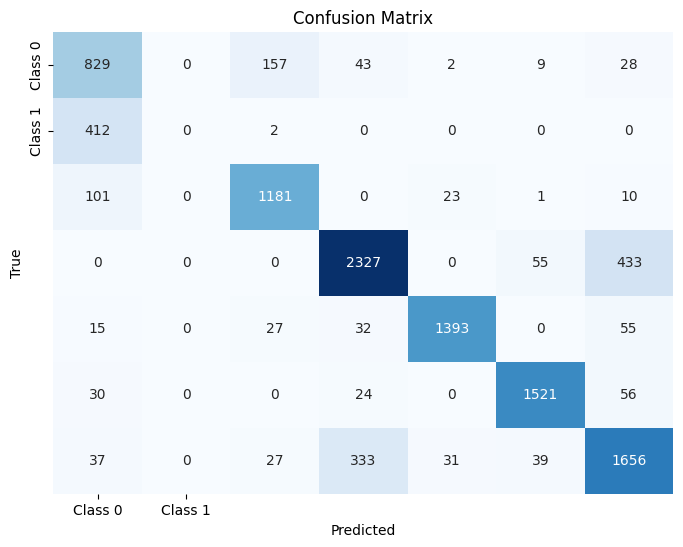

[[ 829    0  157   43    2    9   28]
 [ 412    0    2    0    0    0    0]
 [ 101    0 1181    0   23    1   10]
 [   0    0    0 2327    0   55  433]
 [  15    0   27   32 1393    0   55]
 [  30    0    0   24    0 1521   56]
 [  37    0   27  333   31   39 1656]]


In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm_array = np.array(cm)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(cm_array)

In [ ]:
max_depth_values = range(1, 50)  # Bạn có thể điều chỉnh phạm vi này

# Khởi tạo biến để theo dõi độ sâu tối đa tốt nhất và điểm số tương ứng
best_max_depth = None
best_score = 0.0

# Lặp qua các giá trị max_depth khác nhau
for max_depth in max_depth_values:
    # Khởi tạo DecisionTreeClassifier với max_depth hiện tại
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=91)
    # Fit mô hình với dữ liệu huấn luyện
    clf.fit(x_train, y_train)
    # Đánh giá mô hình trên dữ liệu kiểm tra
    test_score = clf.score(x_test, y_test)
    # Thực hiện cross-validation trên dữ liệu huấn luyện
    #cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    # In ra điểm số cho max_depth hiện tại
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Kiểm tra nếu mô hình hiện tại có điểm số tốt hơn mô hình tốt nhất trước đó
    if test_score > best_score:
        best_score = test_score
        best_max_depth = max_depth

# In ra độ sâu tối đa tốt nhất và điểm số tương ứng
print(f"Best Max Depth = {best_max_depth}: Best Test Score = {best_score}")

Max Depth = 1: Test Score = 0.3935163926898705
Max Depth = 2: Test Score = 0.6419322251813757
Max Depth = 3: Test Score = 0.817981449168886
Max Depth = 4: Test Score = 0.862062632013959
Max Depth = 5: Test Score = 0.8805216273303333
Max Depth = 6: Test Score = 0.8904398934704748
Max Depth = 7: Test Score = 0.8908990724584444
Max Depth = 8: Test Score = 0.8885113417210029
Max Depth = 9: Test Score = 0.8850215814124346
Max Depth = 10: Test Score = 0.889337863899348
Max Depth = 11: Test Score = 0.881807328496648
Max Depth = 12: Test Score = 0.8849297456148406
Max Depth = 13: Test Score = 0.8807052989255212
Max Depth = 14: Test Score = 0.8809808063183029
Max Depth = 15: Test Score = 0.8799706125447699
Max Depth = 16: Test Score = 0.8792359261640187
Max Depth = 17: Test Score = 0.8803379557351455
Max Depth = 18: Test Score = 0.8803379557351455
Max Depth = 19: Test Score = 0.8803379557351455
Max Depth = 20: Test Score = 0.8803379557351455
Max Depth = 21: Test Score = 0.8803379557351455
Max D

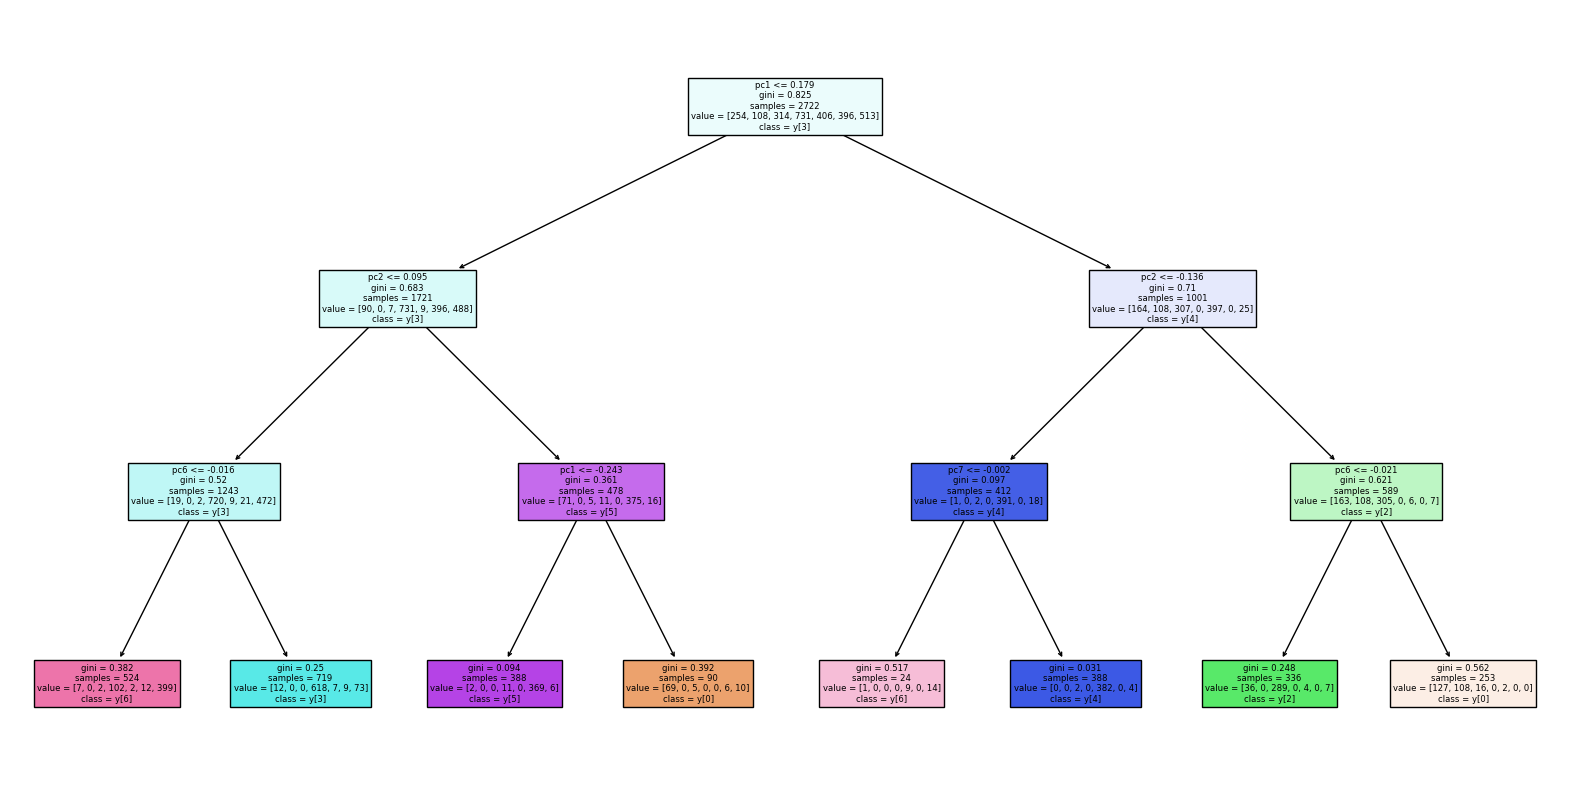

In [ ]:
# Vẽ Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=x.columns, class_names=True)
plt.show()